In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 50)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../data/ltv_prediction_demo_data.csv')

In [3]:
df.head()

,Unnamed: 0,idApp,dt,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,ltvDay30
0,0,279,2018-02-18,0,0,0,2190000,2190000,2190000,5780000,5780000,5780000
1,1,279,2018-04-20,0,0,0,0,0,0,0,0,0
2,2,5620,2017-09-28,0,0,0,0,0,0,0,0,0
3,3,279,2017-12-11,0,0,0,0,0,0,0,3652414,12123190
4,4,5620,2018-02-06,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000


In [4]:
df.shape

(3324150, 12)

In [5]:
df['idApp'].value_counts().head()

5620    1077387
279      532735
5619     484202
278      282209
313      221160
Name: idApp, dtype: int64

In [6]:
features = ['ltvDay' + str(i) for i in range(1,9)]

In [7]:
X_train = df.loc[df['idApp'] == 5620, features + ['dt']]
y_train = df.loc[df['idApp'] == 5620, 'ltvDay30']

In [8]:
X_train.shape, y_train.shape

((1077387, 9), (1077387,))

In [9]:
X_train['dt'].min(), X_train['dt'].max()

('2017-07-05', '2018-06-18')

In [10]:
X_train.sort_values(by='dt').head()

,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,dt
984274,0,0,0,0,0,0,0,0,2017-07-05
855795,0,0,0,0,0,0,0,0,2017-08-19
1334215,0,0,0,0,0,0,0,0,2017-08-26
1393088,0,0,0,0,0,0,0,0,2017-08-28
720424,0,0,0,0,0,0,0,0,2017-08-28


In [11]:
X_train.sort_values(by='dt').tail()

,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,dt
3023494,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,2018-06-18
1372034,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,2018-06-18
2434174,0,0,0,0,0,0,0,0,2018-06-18
152650,7450000,7450000,7450000,7450000,7450000,7450000,7450000,7450000,2018-06-18
2627254,4470000,4470000,4470000,4470000,4470000,4470000,4470000,4470000,2018-06-18


In [15]:
X_train_part = X_train.loc[X_train.dt <= '2017-12-01', features]
X_valid = X_train.loc[X_train.dt >= '2018-01-01', features]
y_train_part = y_train.loc[X_train.dt <= '2017-12-01']
y_valid = y_train.loc[X_train.dt >= '2018-01-01']

In [16]:
X_train_part.shape, X_valid.shape

((464504, 8), (482918, 8))

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge(random_state=17)

In [19]:
%%time
ridge.fit(X_train_part, y_train_part)

CPU times: user 46.3 ms, sys: 14.6 ms, total: 60.9 ms
Wall time: 58.8 ms


Ridge(random_state=17)

In [20]:
ridge_valid_pred = ridge.predict(X_valid)

In [23]:
error = ridge_valid_pred.sum() / y_valid.sum() - 1
print('percentage error: {}'.format(100 * error))

percentage error: -1.1976454523677904


In [25]:
(df['ltvDay30'] == 0).mean()

0.2842431899884181

In [26]:
(y_train == 0).mean()

0.3100882041457712

In [30]:
for  id_app, sub_df in df.groupby('idApp'):
    print(id_app)
    print(sub_df.shape[0])
    print((sub_df['ltvDay30'] == 0).mean())

59
36146
0.4515852376473192
73
27033
0.4154921762290534
80
694
0.3631123919308357
81
567
0.3915343915343915
95
129041
0.802907603009896
148
1570
0.21656050955414013
150
229
0.3056768558951965
151
66
0.3787878787878788
152
27755
0.12696811385335977
153
71
0.18309859154929578
154
102
0.7745098039215687
156
48223
0.26095431640503497
157
14035
0.20014250089063057
158
1427
0.26839523475823407
159
5752
0.092663421418637
160
12427
0.1886215498511306
161
2544
0.3313679245283019
162
3941
0.26211621415884295
165
2110
0.0924170616113744
166
3113
0.17635721169290075
225
4189
0.07925519216996897
236
5
0.0
248
8342
0.06461280268520739
255
1
1.0
260
988
0.19331983805668015
264
1135
0.24845814977973568
278
282209
0.10289537186978445
279
532735
0.12820820858400517
289
1418
0.09167842031029619
291
8268
0.38098693759071117
292
7712
0.39535788381742737
297
768
0.10807291666666667
298
658
0.3343465045592705
299
3963
0.09386828160484481
300
2113
0.19403691433980122
306
1174
0.37052810902896083
313
221160
0.

<AxesSubplot:>

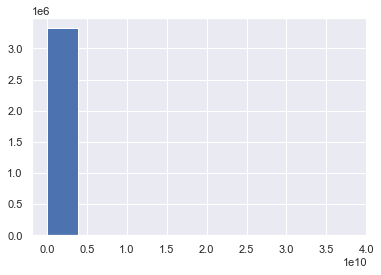

In [32]:
df['ltvDay30'].hist()

<AxesSubplot:>

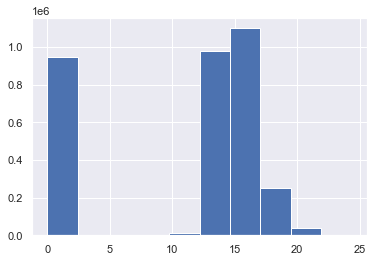

In [31]:
df['ltvDay30'].apply(np.log1p).hist()

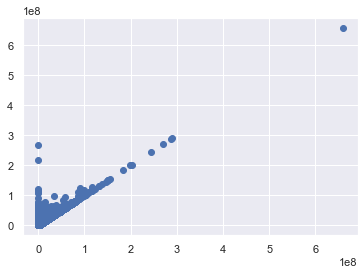

In [33]:
plt.scatter(X_train['ltvDay8'], y_train)